# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [77]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPComplete.greddy=True

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [45]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [27]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [60]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sub_data = app_train.apply(lambda c: le.fit_transform(c) if c.dtype== np.object and c.unique().size<=2 else c, axis=0)
sub_data['DAYS_EMPLOYED_ANOM'] = sub_data["DAYS_EMPLOYED"].map(lambda x: x if x ==365243 else np.nan)
sub_data["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True) 

sub_data['DAYS_BIRTH'] = abs(sub_data['DAYS_BIRTH'])
sub_data['YEARS_BIRTH'] = sub_data['DAYS_BIRTH']/365


In [70]:
sub_data_des= sub_data.describe().T
sub_data_des["unique"] = sub_data.apply(lambda c: c.unique().size, axis=0)
sub_data_des["nan%"] = sub_data.apply(lambda c: ((c.size- c.count())/c.size)*100, axis=0)
sub_data_des["dtype"] = sub_data.dtypes
sub_data_des


,count,mean,std,min,25%,50%,75%,max,unique,nan%,dtype
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,4.562550e+05,307511,0.000000,int64
TARGET,307511.0,0.080729,0.272419,0.000000,0.000000,0.000000,0.000000,1.000000e+00,2,0.000000,int64
NAME_CONTRACT_TYPE,307511.0,0.095213,0.293509,0.000000,0.000000,0.000000,0.000000,1.000000e+00,2,0.000000,int32
FLAG_OWN_CAR,307511.0,0.340108,0.473746,0.000000,0.000000,0.000000,1.000000,1.000000e+00,2,0.000000,int32
FLAG_OWN_REALTY,307511.0,0.693673,0.460968,0.000000,0.000000,1.000000,1.000000,1.000000e+00,2,0.000000,int32
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000,0.000000,0.000000,1.000000,1.900000e+01,15,0.000000,int64
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,1.170000e+08,2548,0.000000,float64
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4.050000e+06,5603,0.000000,float64
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,2.580255e+05,13673,0.003902,float64
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4.050000e+06,1003,0.090403,float64


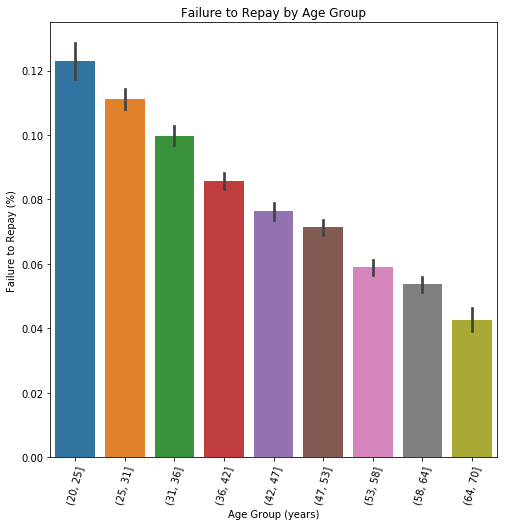

In [78]:
bin_cut =  np.linspace(20, 70, num=10, dtype=np.int64)
sub_data["YEARS_BINNED"] = pd.cut(sub_data["YEARS_BIRTH"], bin_cut)

year_group_sorted = sub_data['YEARS_BINNED'].value_counts().sort_index().index

plt.figure(figsize = (8, 8))
sns.barplot(x="YEARS_BINNED", y="TARGET", data = sub_data)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');


plt.show()
 